# Lecture 5: Marked processes, bipolar model and performance analysis                 

By: [Pedro H. J. Nardelli](http://www.ee.oulu.fi/~nardelli/)

## 1. Marked point processes

### 1.1 Definition

As discussed before, points of point processes can be also labelled with **marks**. A marked point can be formalized as $(x,m)$ such that $x$ represents the location and $m$ the mark attached to it. It is worth mentioning that a point process can have more than one mark.

**Definition:** A marked point process on a space $S$ with marks in a space $M$ is a point process $\mathbf{Y}$ on $S \times M$ such that $N_Y\left(K \times M\right)< \infty$ almost surely for $K \subset S$.

In other words: the corresponding projected process of points without marks is locally finite.

*Exercise 1:* Let $\mathbf{Y}$ be a uniform Poisson process in $\mathbb{R}^3 = \mathbb{R}^2 \times \mathbb{R}$. Can $\mathbf{Y}$ be interpreted as a marked point process?

*Exercise 2:* 

(a) Let $\mathbf{Y}$ be a uniform Poisson process on the three dimensions slab $\mathbb{R}^2 \times [0,a]$ with intensity $\lambda$. Why $\mathbf{Y}$ can be interpreted as a marked point process? 

(b) What is the intensity of the projected  process, obtained by ignoring the marks?

### 1.2 Independent random marks

**Theorem:** Let $\mathbf{Y}$ be a marked point process on $S$ with marks in $M$. Let $\mathbf{X}$ be the projected process in $S$ of points without marks. Then the following are equivalent:

(1) $\mathbf{X}$ is a Poisson process in $S$ with intensity $\lambda$, and given $\mathbf{X}$, the marks attached to the points of $\mathbf{X}$ are independent and identically distributed with common distribution $Q$ on $M$;


(2) $\mathbf{Y}$ is a Poisson process in $S \times M$ with intensity measure $\lambda \otimes Q$.


## 2. Bipolar model

Finally we are going to analyze a wireless network based on the so-called **bipolar model**. In this model, we assume that every snapshot of the wireless network (positions) can be represented by a marked Poisson point process such that the ground process is in $\mathbb{R}^2$ with intensity $ \lambda$ and the (multimensional) marks are independent and identically distributed.

**Definition:** Let  $\tilde{\Phi} = \{ (x_i,e_i, y_i)\}$ represent the marked Poisson point process such that:

(1) The ground process is $\Phi = \{ x_i\}$ where $x_i$ denotes the location of the potential transmitters with density $\lambda>0$ in TXs/m$^2$.


(2) $\{e_i\}$ is the medium access indicator: node $i$ is allowed to transmit if $e_i=1$ and it is not allowed if $e_i=0$. For slotted ALOHA protocol. $e_i$ is a random variable independent and identically distributed such that $\mathbb{P}(e_i=1) = p$ and  $\mathbb{P}(e_i=0) = 1-p$.


(3) $\{y_i\}$ denotes the location of the receiver associated with the transmitter $x_i$ to form a communication pair. We assume that the random vectors ${x_i - y_i}$ are independent and identically distributed such that  $|x_i - y_i| = r$. Here we consider that $r$ is constant.

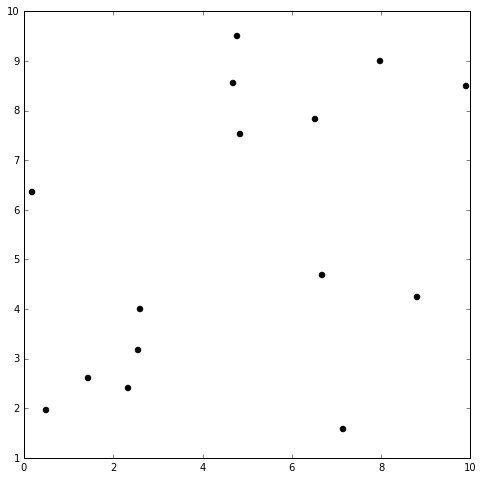

In [23]:
from matplotlib import pyplot as plt
import numpy as np

#########################
###(1) Ground process###
########################
#Square side: L2
L2 = 10
#Average number of points (Poisson)
x_average_PPP = 20
#Number of points N that is a Poisson random variable 
x_realization_PPP = np.random.poisson(x_average_PPP,1)
#Random points in axis x
position_x_realization_PPP_TX =  np.random.uniform(0,L2,x_realization_PPP)
#Random points in axis y
position_y_realization_PPP_TX = np.random.uniform(0,L2,x_realization_PPP) 
#Plot commands
plt.figure(figsize=(8,8), dpi=1200)
plt.plot(position_x_realization_PPP_TX, position_y_realization_PPP_TX, marker='o', color='k',linestyle = '')
#plt.axis('off')
plt.show()

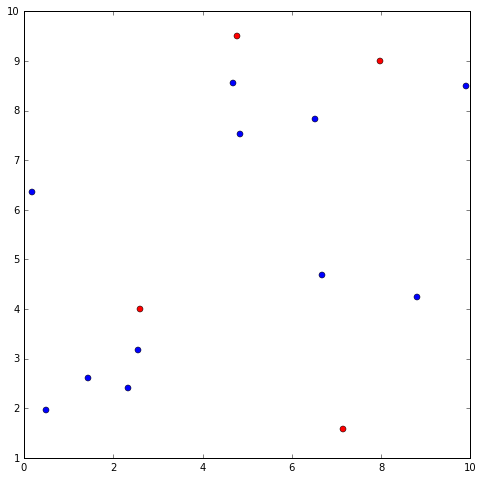

In [24]:
#####################
###(2) ALOHA #######
####################
import random
#aloha probability
p=0.7

#declaring a list of unknown size
position_x_realization_PPP_TX_e_1 = []
position_y_realization_PPP_TX_e_1 = []
position_x_realization_PPP_TX_e_0 = []
position_y_realization_PPP_TX_e_0 = []


for xx in range(0,x_realization_PPP[0]):
    if random.random() < p:
        #add element to the list
        position_x_realization_PPP_TX_e_1.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_1.append(position_y_realization_PPP_TX[xx])
    else:
        #add element to the list
        position_x_realization_PPP_TX_e_0.append(position_x_realization_PPP_TX[xx])
        position_y_realization_PPP_TX_e_0.append(position_y_realization_PPP_TX[xx])
    xx+=1
    
#converting the list to a np.array
position_x_realization_PPP_TX_e_1 = np.array(position_x_realization_PPP_TX_e_1)
position_y_realization_PPP_TX_e_1 = np.array(position_y_realization_PPP_TX_e_1 )
position_x_realization_PPP_TX_e_0 = np.array(position_x_realization_PPP_TX_e_0)
position_y_realization_PPP_TX_e_0 = np.array(position_y_realization_PPP_TX_e_0)


plt.figure(figsize=(8,8), dpi=1200)
plt.plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
plt.plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')
plt.show()

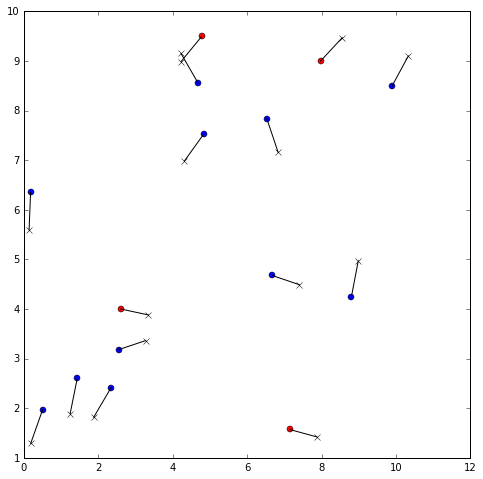

In [25]:
#####################
###(3) Receivers####
####################

#distance between TX-RX (fixed)
dist_TX_RX = 0.75

#angles of the receivers
angle_RX = np.random.uniform(0,2*np.pi,x_realization_PPP)
#setting arrays
position_x_realization_PPP_RX = np.zeros(x_realization_PPP)
position_y_realization_PPP_RX = np.zeros(x_realization_PPP)

#RXs position
for xx in range(0,x_realization_PPP[0]):
    position_x_realization_PPP_RX[xx] = position_x_realization_PPP_TX[xx] + dist_TX_RX*np.cos(angle_RX[xx])
    position_y_realization_PPP_RX[xx] = position_y_realization_PPP_TX[xx] + dist_TX_RX*np.sin(angle_RX[xx])
    xx+=1

plt.figure(figsize=(8,8), dpi=1200)
plt.plot(position_x_realization_PPP_RX, position_y_realization_PPP_RX, marker='x', color='k',linestyle = '')
plt.plot(position_x_realization_PPP_TX_e_1, position_y_realization_PPP_TX_e_1, marker='o', color='b',linestyle = '')
plt.plot(position_x_realization_PPP_TX_e_0, position_y_realization_PPP_TX_e_0, marker='o', color='r',linestyle = '')
#plot lines between links - bipoles
plt.plot([position_x_realization_PPP_TX, position_x_realization_PPP_RX],
         [position_y_realization_PPP_TX, position_y_realization_PPP_RX],  color='k',linestyle = '-')
plt.show()

It is worth noting the border effect here. Our initial area was $L=10$, but due to the receivers it was "extended".

### 3. Performance analysis

The performance of wireless system normally depends on the signal-to-noise ratio experienced at the receiver node, which will indicate the channel capacity, outage probability, bit error rate etc. In a bipolar network, however, we the more interested in the **signal-to-interference ratio**. But, why? 

*Exercise:* Take a partner in the class and start talking. What happens when all pairs are talking at the same time? And when some stop talking?

### 3.1 Scenario

**Description**

- Bipolar wireless network $\tilde{\Phi} = \{ (x_i,e_i, y_i)\}$ such that the ground process has intensity $\lambda$, the transmitters access the network with probability $p$ and the receivers are located at a distance $r$ far from its respective transmitter.


- Channel is modeled only considering the path-loss with omni-directional antennas.Then, the power experienced at a given receiver is a function of the distance $x>0$: $f(x) = g x^{-\alpha}$ where $g > 0$ is the channel gain assumed equal to all transmitters and $\alpha>2$ is the path-loss exponent. It is worth mentioning that when $x<1$ this model is not appropriate.


- The network is assumed *interference-limited* so that the noise effect is neglected. 


- The receivers employ the decoding rule *treat-interference-as-noise* where the message can be successfully decoded if $\textrm{SIR} > \beta$. 

**Analysis**

[Step 1] The point process $\tilde{\Phi}$ is stationary and then it is worth to analyze a typical link, which will be referred by using the index $0$. The point process is then $\tilde{\Phi} \cup \{x_0,e_0,y_0\}$. The receiver of the typical link will be located at the origin - i.e. $y_0 = (0,0)$.

[Step 2] Find the process of active links as thinning of  $\tilde{\Phi}$  keeping only the points (transmitters) that $e_i = 1$. Let us denote the thinned marked process $\tilde{\Phi}_1$ whose density is $p \lambda$.

[Step 3] Compute the signal-to-interference ratio at $y_0$ as  $\mathrm{SIR}_0 = \dfrac{g r^{-\alpha}}{I_1}$, where $I_1 = \sum\limits_{x_i \in  \tilde{\Phi}_1}g |x_i|^{-\alpha}$.

[Step 4] How to deal with $I_1 = \sum\limits_{x_i \in  \tilde{\Phi}_1}g |x_i|^{-\alpha}$? First it is important to remember that we would like to analyze the perfornance of the systems over different spatial realizations of $\tilde{\Phi}$ and therefore we are not considering a specific realization of the network. In this case, $I_1$ is a *random variable* that is the sum of the path-loss function applied for every point of  $\tilde{\Phi}_1$ and our goal is to find the statistics of $I_1$.

[Step 4.1] **Lower bound of the random variable $I_1$:** As we consired only path-loss, the nearest interferer to $y_0$ can be viewed as a lower bound of $I_1$. This bound is interesting since we know such probability distribution (contact region) from our last lecture: $F_{R_\mathrm{c}}(x) = 1 -e^{-p \lambda \pi x^2}$ where $R_\mathrm{c}$ denotes the random variable of the closest interferer distance. 

[Step 4.2] **Outage probability:** More important for us than the distribution of the interference at a typical receiver itself is the probability that the typical link is in *outage*, i.e. $\mathbb{P}(\textrm{SIR} \leq \beta)$. A lower bound of the outage probability can be found using the closest interferer. Then: $\mathbb{P}(\textrm{SIR} \leq \beta) \geq \mathbb{P} \left( \dfrac{r^{-\alpha}}{x^{-\alpha}} \leq \beta \right)$.

[Step 4.3] **Manipulating:**  $\mathbb{P}(\textrm{SIR} \leq \beta) \geq \mathbb{P} \left( \dfrac{r^{-\alpha}}{X_\mathrm{c}^{-\alpha}} \leq \beta \right) = \mathbb{P}\left( X_\mathrm{c}  \leq \beta^{1/\alpha} r\right) = F_{R_\mathrm{c}}\left(\beta^{1/\alpha} r \right) = 1 -e^{-p \lambda \pi r^2 \beta^{2/\alpha} } = f(\alpha, \lambda,\beta, r, p)$

[Step 4.4] Testing the results (in this case in relation to  $r$, given $\alpha$, $\beta$ and $\lambda$.


In [37]:
#Testing
import numpy as np
from scipy.spatial import distance
from __future__ import division

#pathloss
alpha=3
#SIR required
beta= 3
#aloha prob
p=1
#Average number of points (Poisson)
x_average_PPP = p*25
#Square side: L
L = 30
#number of realizations to get the outage prob for 1 point
num_realizations = 1000
#number of simulation points
num_of_point_for_outage = 20
#
outage_prob = np.zeros(num_of_point_for_outage)
r = np.linspace(0,4,num_of_point_for_outage)

for count2 in range(1, num_of_point_for_outage):
    outage = 0
    for count in range(0, num_realizations):
        #Number of points N that is a Poisson random variable 
        x_realization_PPP = np.random.poisson(x_average_PPP,1)
        #Random points in axis x
        position_x_realization_PPP =  np.random.uniform(0,L,x_realization_PPP)
        #Random points in axis y
        position_y_realization_PPP = np.random.uniform(0,L,x_realization_PPP) 
        #Manipulating arrays
        position_x_realization_PPP_t=np.transpose(position_x_realization_PPP)
        position_y_realization_PPP_t=np.transpose(position_y_realization_PPP)
        position_final = []
        position_final = [[position_x_realization_PPP_t[ix], position_y_realization_PPP_t[ix]] for ix in range(0, x_realization_PPP)]
        #Distances to the origin (L/2,L/2)
        distances_to_origin = [distance.euclidean(position_final[ix],[L/2,L/2]) for ix in range(0, x_realization_PPP)]
        #getting the power of each interferer
        path_loss = np.array([distances_to_origin[xx]**(-alpha) for xx in range(0, x_realization_PPP)])
        #computing aggregate interference
        interference = sum(path_loss)
        if (r[count2]**(-alpha)/interference) <= beta:
                outage = outage + 1   
        count = count + 1
    outage_prob[count2] = outage/count
    count2 = count2 + 1
#print outage_prob

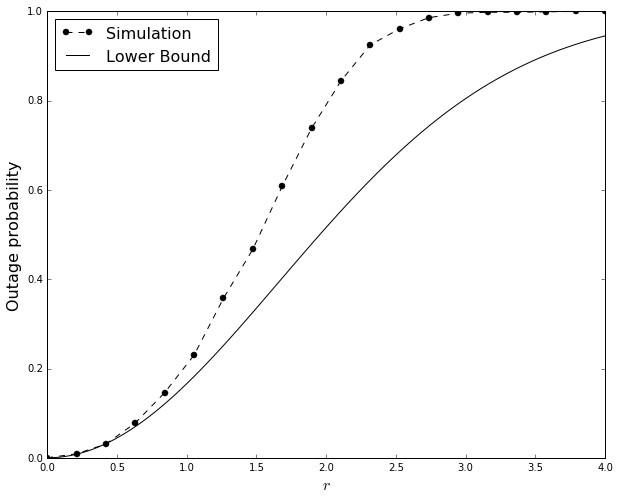

In [38]:
#Testing
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
#alpha = 3
#beta = 3
#p = 1

plt.figure(figsize=(10,8), dpi=1200)
plt.plot(r,outage_prob,'o--k',label = "Simulation")
x = np.linspace(0,4,100)
plt.xlabel('$r$', fontsize=16)
plt.ylabel('Outage probability', fontsize=16)
plt.plot(x, 1 - np.exp(- (x**2) * beta**(2/alpha) * np.pi * p * x_average_PPP/(L**2)),'k-' ,label = "Lower Bound")
plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.show()

[Step 5] **Performance analysis using the outage probability ($P_\mathrm{out} = f(\alpha, \lambda,\beta, r)$):** What else we can assess?

- Expected progress: $r \times (1- P_\mathrm{out})$ in [m]

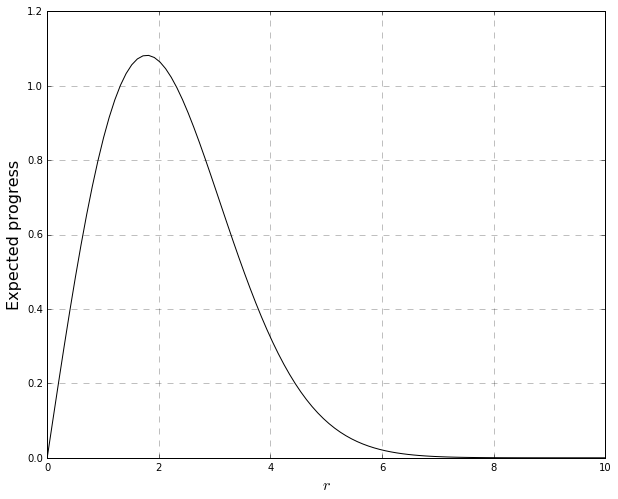

In [28]:
#Expected progress
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
beta = 3
density = 0.05
p = 1

plt.figure(figsize=(10,8), dpi=1200)
r = np.linspace(0,10,100)
plt.xlabel('$r$', fontsize=16)
plt.ylabel('Expected progress', fontsize=16)
plt.plot(r, r * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * density),'k-')
#plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()


- Throughput:  $(1- P_\mathrm{out}) \times \log(1+\beta)$ in [bit/s/Hz]


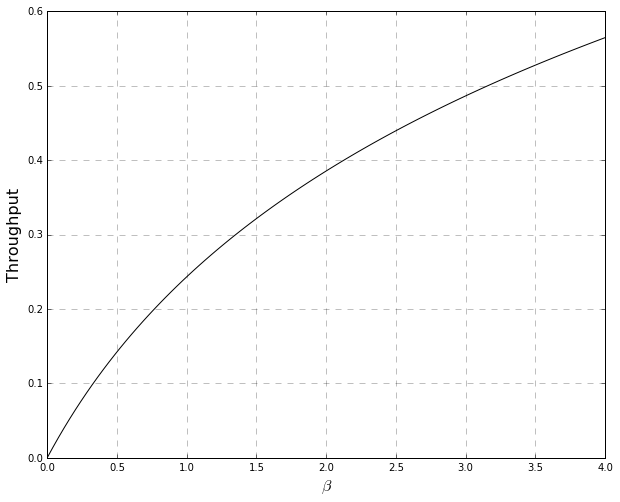

In [29]:
#Throughput
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
density = 0.05
r = 3
p = 1

plt.figure(figsize=(10,8), dpi=1200)
beta = np.linspace(0,4,100)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Throughput', fontsize=16)
plt.plot(beta, (np.log(1+beta)/np.log(2)) * np.exp(- (r**2) * beta**(2/alpha) * np.pi * p * density),'k-')
#plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

- Information efficiency:  $r \times (1- P_\mathrm{out}) \times \log(1+\beta)$ in [bit-m/s/Hz]




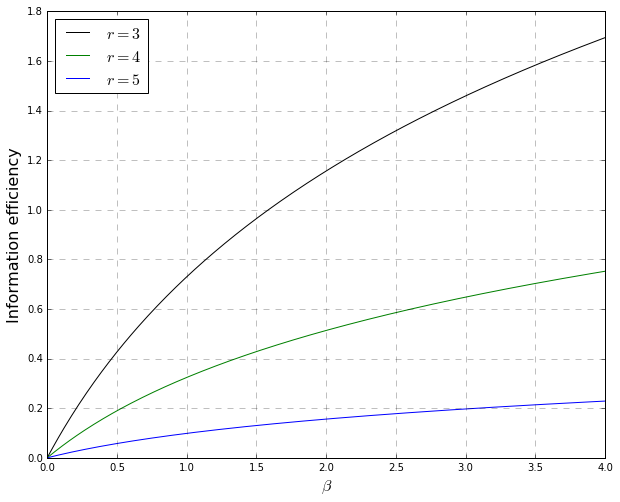

In [30]:
#IE
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
density = 0.05
r1 = 3
r2 = 4
r3 = 5
p = 1

plt.figure(figsize=(10,8), dpi=1200)
beta = np.linspace(0,4,300)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Information efficiency', fontsize=16)
plt.plot(beta, r1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r1**2) * beta**(2/alpha) * np.pi * p * density),'k-',label = "$r=3$")
plt.plot(beta, r2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r2**2) * beta**(2/alpha) * np.pi * p * density),'g-',label = "$r=4$")
plt.plot(beta, r3 * (np.log(1+beta)/np.log(2)) * np.exp(- (r3**2) * beta**(2/alpha) * np.pi * p * density),'b-',label = "$r=5$")
#plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

- Spatial throughput: $p \times \lambda  \times (1- P_\mathrm{out}) \times \log(1+\beta)$ in [bit/s/Hz/m$^2$]




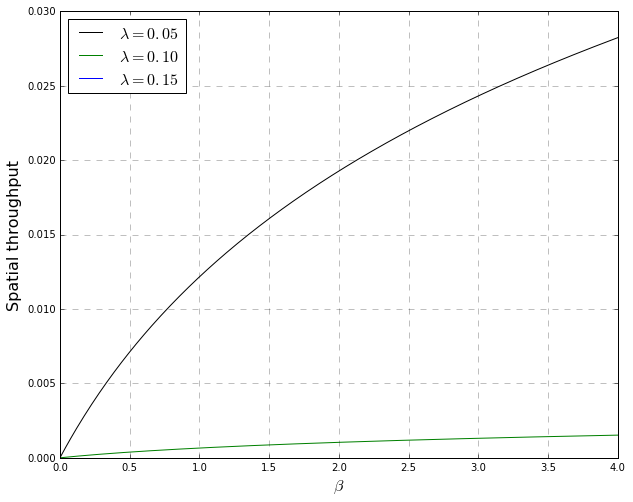

In [31]:
#Spatial throughput
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
r = 3
#beta = 3
density1 = 0.05
density2 = 0.1
density3 = 0.2
p = 1

plt.figure(figsize=(10,8), dpi=1200)
beta = np.linspace(0,4,300)
plt.xlabel(r'$\beta$', fontsize=16)
plt.ylabel('Spatial throughput', fontsize=16)
plt.plot(beta, density1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r1**2) * beta**(2/alpha) * np.pi * p * density1),'k-',label = "$\lambda=0.05$")
plt.plot(beta, density2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r2**2) * beta**(2/alpha) * np.pi * p * density2),'g-',label = "$\lambda=0.10$")
plt.plot(beta, density3 * (np.log(1+beta)/np.log(2)) * np.exp(- (r3**2) * beta**(2/alpha) * np.pi * p * density3),'b-',label = "$\lambda=0.15$")
#plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.show()

- Aggregate information efficiency: $p \times \lambda \times r \times (1- P_\mathrm{out}) \times \log(1+\beta)$ in [bit-m/s/Hz/m$^2$]

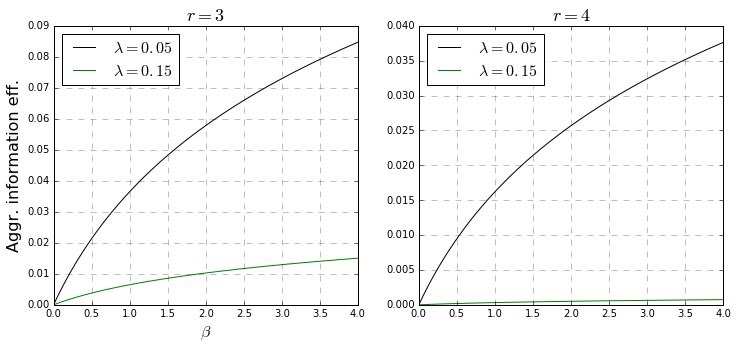

In [32]:
#A-IE
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#
alpha = 3
density1 = 0.05
density2 = 0.15
r1 = 3
r2 = 4
p = 1



fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=1200)
beta = np.linspace(0,4,300)


#plt.subplot(211)
axes[0].set_xlabel(r'$\beta$', fontsize=16)
axes[0].set_ylabel('Aggr. information eff.', fontsize=16)
axes[0].plot(beta, density1 * r1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r1**2) * beta**(2/alpha) * np.pi * p * density1),
         'k-',label = "$\lambda = 0.05$")
axes[0].plot(beta, density2 * r1 * (np.log(1+beta)/np.log(2)) * np.exp(- (r1**2) * beta**(2/alpha) * np.pi * p * density2),
         'g-',label = "$\lambda = 0.15$")
#axes[0].axis([0,4,0,0.04])
axes[0].legend(loc=2,fontsize=16)
axes[0].grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[0].set_title("$r = 3$",fontsize=18)

#plt.subplot(212)
#xlabel(r'$\beta$', fontsize=16)
axes[1].plot(beta, density1 * r2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r2**2) * beta**(2/alpha) * np.pi * p * density1),
         'k-',label = "$\lambda = 0.05$")
axes[1].plot(beta, density2 * r2 * (np.log(1+beta)/np.log(2)) * np.exp(- (r2**2) * beta**(2/alpha) * np.pi * p * density2),
         'g-',label = "$\lambda = 0.15$")
#axes[1].axis([0,4,0,0.04])
axes[1].legend(loc=2,fontsize=16)
axes[1].grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].set_title("$r = 4$",fontsize=18)
fig.show()

**Challenge:** Try to find the optimal points using derivatives.

## 4. References

[1] A. Baddeley, *Spatial Point Processes and their Applications*, pages 19-21.

[2] M. Haenggi, *Stochastic Geometry for Wireless Networks*, pages 97-99, 108-110 and 138-143.

[3] F. Baccelli, B.BlaszczyszynStochastic, *Geometry and Wireless Networks, Volume II- Applications*, pages 3-5

[4] P. Nardelli, *Analysis of the spatial throughput in interference networks*, pages 22-26


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.